In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree




In [128]:
df_model = pd.read_csv('D:\soccer_position\data\process\clean_data.csv')

In [129]:
#list(data_model.columns)
columns_to_drop = ['short_name', 'player_positions', 'simple_position']

In [130]:
X = df_model.drop(columns=columns_to_drop)

In [131]:
y = df_model['simple_position']

In [ ]:
# Normalisasi menggunakan min max scaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split data untuk train dan test

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=27, stratify=y)

In [ ]:
# Training data

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [135]:
# Test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi data

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[1133  139    7]
 [ 144 1096  167]
 [   8  177  551]]
              precision    recall  f1-score   support

         Bek       0.88      0.89      0.88      1279
   Gelandang       0.78      0.78      0.78      1407
   Penyerang       0.76      0.75      0.75       736

    accuracy                           0.81      3422
   macro avg       0.81      0.80      0.81      3422
weighted avg       0.81      0.81      0.81      3422



In [137]:
# 1. Buat DataFrame-nya. Agar lebih jelas, kita beri nama kolomnya 'importance'.
features = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['importance'])

# # 2. Urutkan dan print (versi perbaikan)
# #    - Kita tambahkan by='importance'
# #    - Kita ganti false menjadi False
display(features.sort_values(by='importance', ascending=False))

,importance
defending_sliding_tackle,0.261758
mentality_vision,0.188355
attacking_heading_accuracy,0.102437
skill_long_passing,0.061814
attacking_crossing,0.045478
attacking_finishing,0.037768
overall,0.029862
attacking_short_passing,0.025354
defending_marking_awareness,0.018242
movement_sprint_speed,0.017575


In [142]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': [5, 10, 15, 20],
#     'min_samples_split':[20, 50, 100],
#     'min_samples_leaf':[10, 20, 40]
# }


In [143]:
# grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
#                            param_grid=param_grid,
#                            cv=5,
#                            n_jobs=-1, # Gunakan semua core CPU agar lebih cepat
#                            verbose=2)

In [144]:
# grid_search.fit(X_train, y_train)


In [145]:
# print("\nKombinasi parameter terbaik:")
# print(grid_search.best_params_)

In [146]:
#Kombinasi parameter terbaik:
#{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}

best_params = {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}

model3 = DecisionTreeClassifier(**best_params)

In [147]:
model3.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,20
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [148]:
y_pred3 = model3.predict(X_test)


In [149]:
print(confusion_matrix(y_test, y_pred3))

print(classification_report(y_test, y_pred3))

[[1157  122    0]
 [ 112 1179  116]
 [   3  174  559]]
              precision    recall  f1-score   support

         Bek       0.91      0.90      0.91      1279
   Gelandang       0.80      0.84      0.82      1407
   Penyerang       0.83      0.76      0.79       736

    accuracy                           0.85      3422
   macro avg       0.85      0.83      0.84      3422
weighted avg       0.85      0.85      0.85      3422



In [150]:
# 1. Buat DataFrame-nya. Agar lebih jelas, kita beri nama kolomnya 'importance'.
features2 = pd.DataFrame(model3.feature_importances_, index = X.columns, columns=['importance'])

# 2. Urutkan dan print (versi perbaikan)
#    - Kita tambahkan by='importance'
#    - Kita ganti false menjadi False
display(features2.sort_values(by='importance', ascending=False))

,importance
defending_sliding_tackle,0.325095
mentality_vision,0.232509
attacking_heading_accuracy,0.123572
skill_long_passing,0.070811
attacking_crossing,0.049491
attacking_finishing,0.035958
overall,0.034817
attacking_short_passing,0.023624
movement_sprint_speed,0.013834
defending_marking_awareness,0.012589


15 Fitur Paling Penting Menurut Model Terbaik:


C:\Users\faust\AppData\Local\Temp\ipykernel_14948\2978414737.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance',


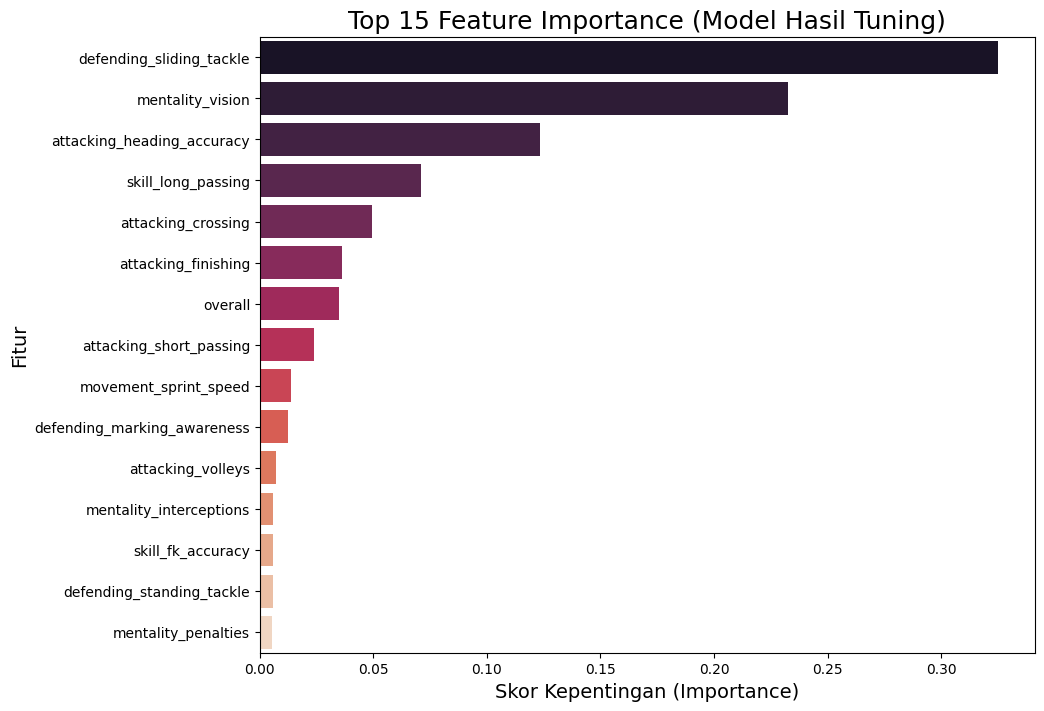

In [154]:
# Dapatkan nama-nama fitur dari kolom dataframe X
feature_names = X.columns

# Dapatkan skor kepentingan dari model terbaik
importances = model3.feature_importances_

# Buat DataFrame untuk menggabungkan nama fitur dan skornya
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False).reset_index(drop=True)

# --- Membuat Visualisasi ---
print("15 Fitur Paling Penting Menurut Model Terbaik:")

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', 
            y='feature', 
            data=feature_importance_df.head(15), 
            palette='rocket')

plt.title('Top 15 Feature Importance (Model Hasil Tuning)', fontsize=18)
plt.xlabel('Skor Kepentingan (Importance)', fontsize=14)
plt.ylabel('Fitur', fontsize=14)
plt.show()

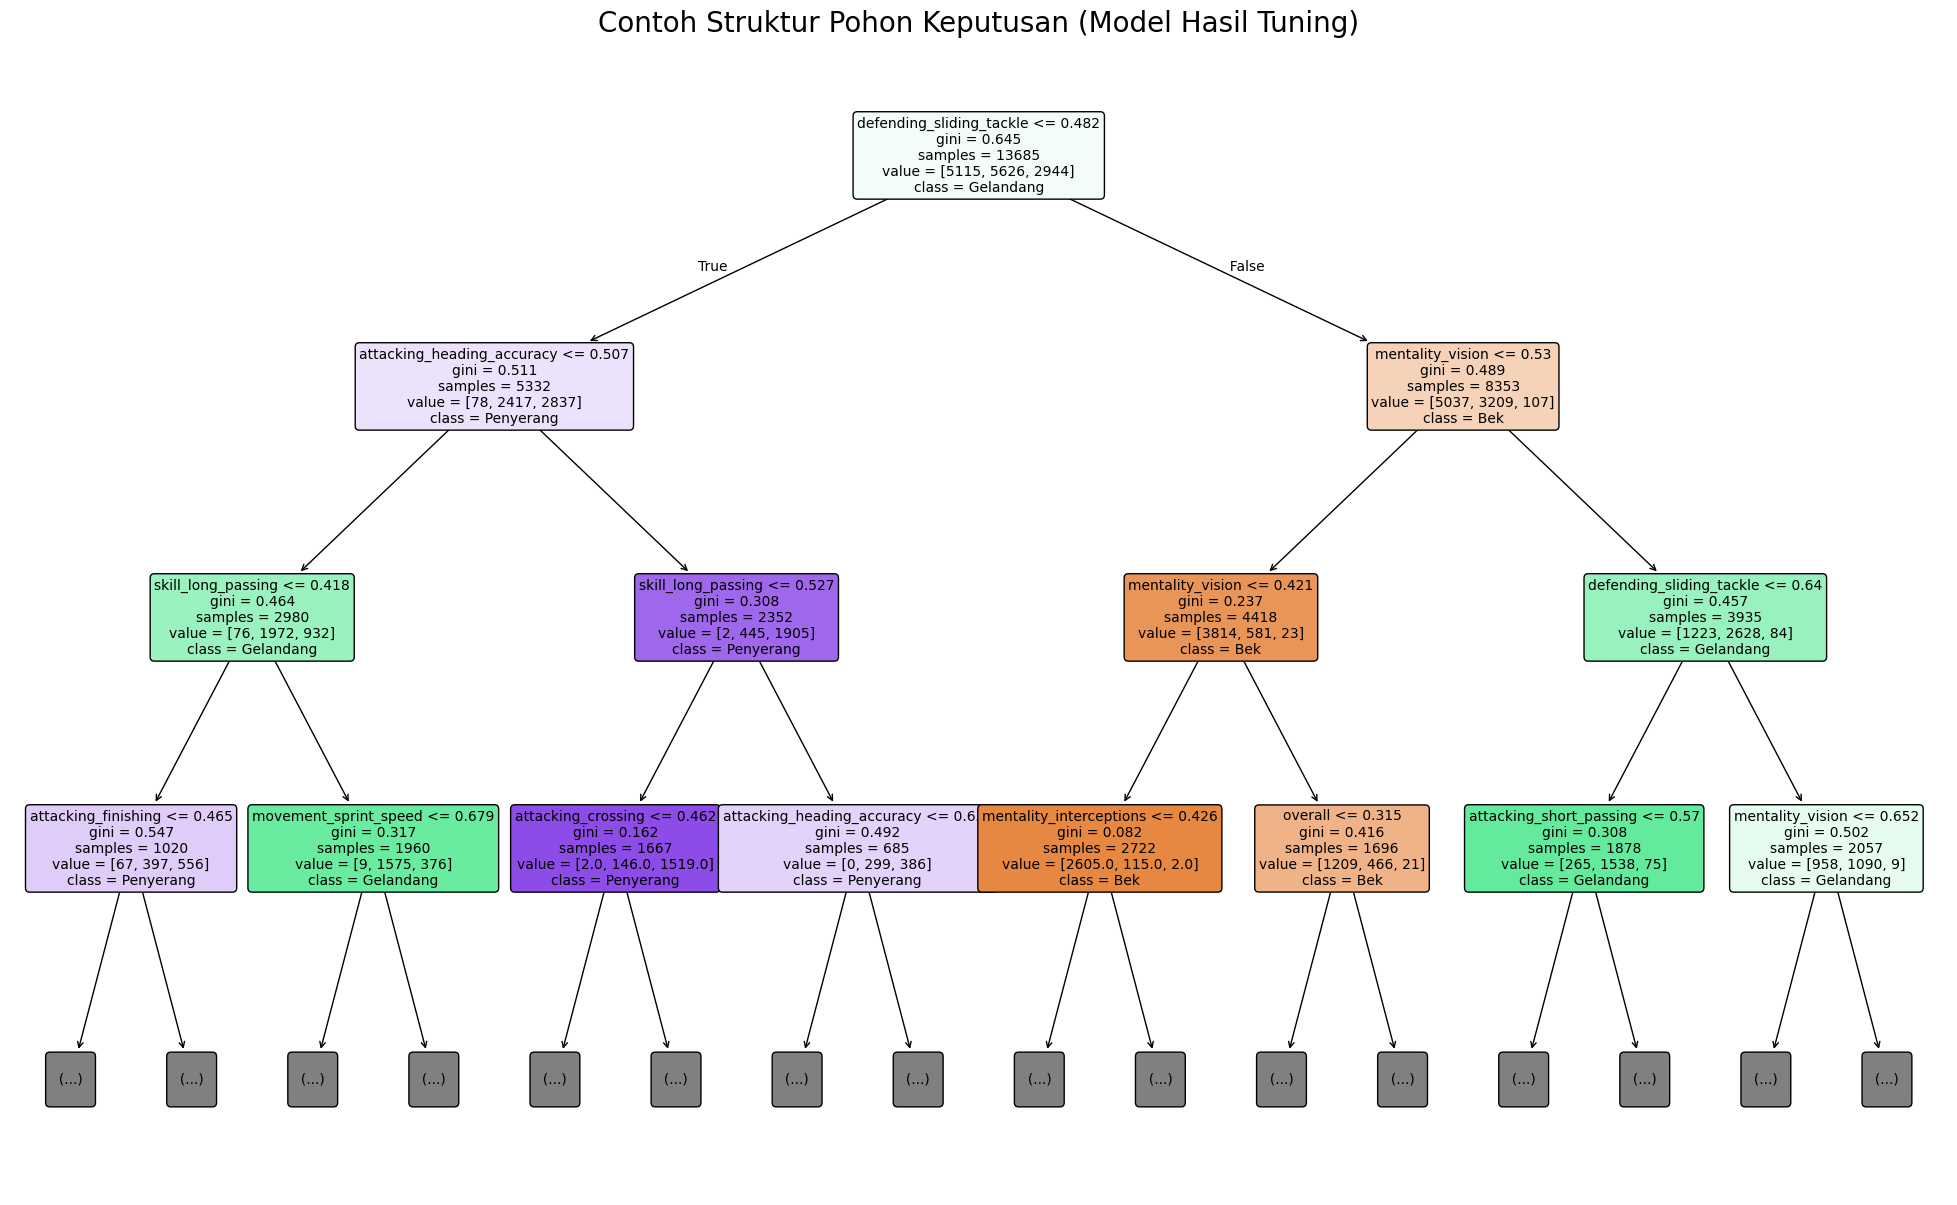

In [156]:
# Impor library khusus untuk pohon
from sklearn import tree

# --- Membuat Visualisasi ---
plt.figure(figsize=(25, 15))

# Kita gambar pohon dari best_model dan batasi kedalamannya (max_depth=3) agar bisa dibaca
# Ini hanya untuk tujuan visualisasi contoh aturan, bukan menampilkan keseluruhan pohon
tree.plot_tree(model3,
               feature_names=feature_names,
               class_names=model3.classes_, # Ambil urutan kelas dari model
               filled=True,
               rounded=True,
               max_depth=3,
               fontsize=10)

plt.title("Contoh Struktur Pohon Keputusan (Model Hasil Tuning)", fontsize=20)
plt.show()

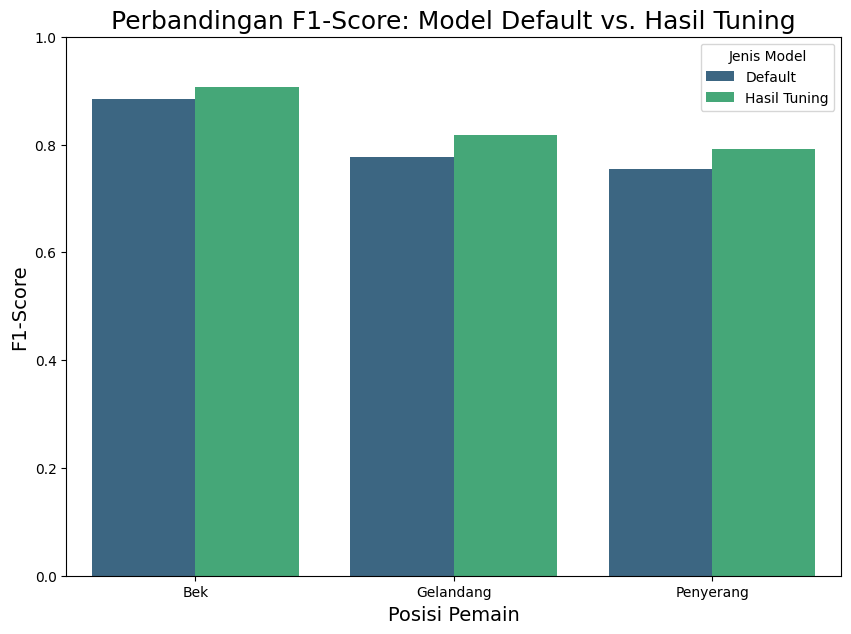

In [157]:
# Impor library yang dibutuhkan
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dapatkan classification report sebagai dictionary agar mudah diolah
report_default = classification_report(y_test, y_pred, output_dict=True)
report_terbaik = classification_report(y_test, y_pred3, output_dict=True)

# Siapkan data untuk diplot
posisi = ['Bek', 'Gelandang', 'Penyerang']
f1_default = [report_default[p]['f1-score'] for p in posisi]
f1_terbaik = [report_terbaik[p]['f1-score'] for p in posisi]

# Buat DataFrame untuk perbandingan
df_compare = pd.DataFrame({
    'Posisi': posisi * 2,
    'F1-Score': f1_default + f1_terbaik,
    'Model': ['Default'] * len(posisi) + ['Hasil Tuning'] * len(posisi)
})

# Buat visualisasi bar chart perbandingan
plt.figure(figsize=(10, 7))
sns.barplot(x='Posisi', y='F1-Score', hue='Model', data=df_compare, palette='viridis')

plt.title('Perbandingan F1-Score: Model Default vs. Hasil Tuning', fontsize=18)
plt.ylabel('F1-Score', fontsize=14)
plt.xlabel('Posisi Pemain', fontsize=14)
plt.ylim(0, 1.0) # Atur limit sumbu Y dari 0 sampai 1
plt.legend(title='Jenis Model')
plt.show()

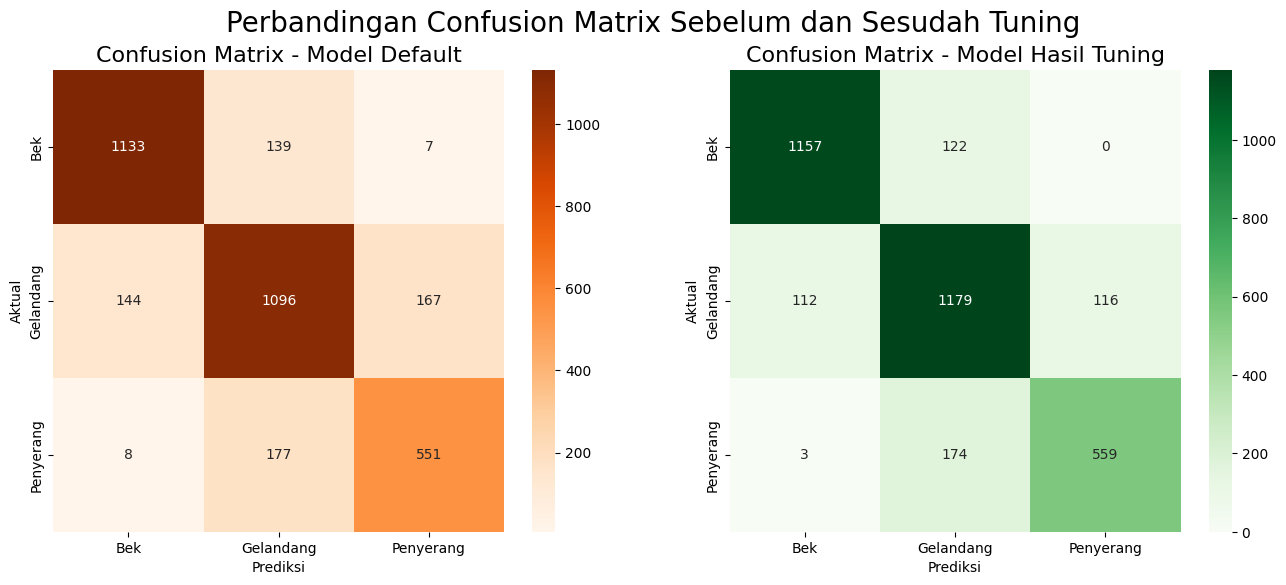

In [158]:
from sklearn.metrics import confusion_matrix

# Buat matriks untuk kedua model
cm_default = confusion_matrix(y_test, y_pred, labels=model.classes_)
cm_terbaik = confusion_matrix(y_test, y_pred3, labels=model3.classes_)

# Siapkan area plot untuk 2 grafik berdampingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 1 baris, 2 kolom

# Plot untuk Model Default
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Oranges', ax=axes[0],
            xticklabels=model.classes_, yticklabels=model.classes_)
axes[0].set_title('Confusion Matrix - Model Default', fontsize=16)
axes[0].set_xlabel('Prediksi')
axes[0].set_ylabel('Aktual')

# Plot untuk Model Terbaik (Hasil Tuning)
sns.heatmap(cm_terbaik, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=model3.classes_, yticklabels=model3.classes_)
axes[1].set_title('Confusion Matrix - Model Hasil Tuning', fontsize=16)
axes[1].set_xlabel('Prediksi')
axes[1].set_ylabel('Aktual')

# Judul utama untuk keseluruhan gambar
plt.suptitle('Perbandingan Confusion Matrix Sebelum dan Sesudah Tuning', fontsize=20)
plt.show()